### 목표
- 타이타닉 데이터를 모델에 학습시켜서 생존/사망 예측해보자!
- 머신러닝의 전체 과정을 진행 해보자!

#### 1. 문제 정의
- Kaggle 에서 제공하는 titanic 데이터를 사용해 승객의 생존 여부를 예측
- 지도 학습
- Survived 컬럼은 데이터 값은 수치형이지만 0,1 로 생존 여부만 구분하고 있기 때문에 우선순위는 없음
- 분류

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 시각화 도구
import seaborn as sns

#### 2. 데이터 수집
- 타이타닉 train 데이터와 test 데이터를 변수 train, test 에 저장

In [2]:
train = pd.read_csv('./data/train.csv', index_col = 'PassengerId')
test = pd.read_csv('./data/test.csv', index_col = 'PassengerId')

train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# 크기 확인
print(train.shape)
print(test.shape)

(891, 11)
(418, 10)


#### 3. 데이터 전처리 및 데이터 탐색

In [4]:
# 훈련 데이터 셋 정보 확인
train.info()

# 결측치가 있는 칼럼 : Age, Cobin(갯실 번호), Embarked
# 문자 -> 숫자 : 인코딩

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
test.info()
# 결측치가 있는 컬럼 : Age, Fare, Cobin(갯실 번호)
# 필요시 인코딩

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [6]:
# 컬럼 정보 정리
train.columns
'''
Pclass : 객실의 등급 (1: 상위층, 2:중상위, 3:하위층)
SibSp : 형제 자매 / 배우자 (같이 탑승한)
Parch : 부모 / 자식 (같이 탑승한)
Ticket : 티켓 번호 
Fare : 요금
Cabin : 객실 번호
Embarked : 승선항 (S, C, Q)
'''

'\nPclass : 객실의 등급 (1: 상위층, 2:중상위, 3:하위층)\nSibSp : 형제 자매 / 배우자 (같이 탑승한)\nParch : 부모 / 자식 (같이 탑승한)\nTicket : 티켓 번호 \nFare : 요금\nCabin : 객실 번호\nEmbarked : 승선항 (S, C, Q)\n'

#### 결측치 채우기
- train : Age, Cabin, Embarked
- test : Age, Fare, Cabin

In [7]:
# 결측치를 채우는 방법
# 1. 결측치가 있는 행 전체를 삭제하는 방법
# >>> 삭제하려는 데이터가 너무 많거나 모델링 치명적이지 않은 데이터여야만 한다
# >>> 데이터가 많을 수록 과대적합을 피할 수 있는데, 삭제해버리면 학습할 데이터가 줄어들어 버림

# 2. 결측치를 다른값(대표값)으로 대체 하는 방법
# >>> 평균, 최빈값, 중앙값

- train - Embarked 칼럼 결측치 채우기

In [8]:
train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [9]:
# Embarked 컬럼의 결측치는?
train['Embarked'].isnull().sum()

2

In [10]:
# 결측치가 있는 데이터 출력
train[train['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [11]:
# fillna('값')
# 비어 있는 데이터가 있다면 '값'으로 채워주는 함수
train['Embarked'] = train['Embarked'].fillna('S')

In [12]:
train['Embarked'].isnull().sum()

0

- test : Fare 컬럼의 결측치를 채우기

In [13]:
test[test['Fare'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [14]:
# 상관 관계 확인
test.corr(numeric_only = True) # 숫자 컬럼 포함
# 상관계수 : -1 ~ 1 범위로 표현
# -1 or 1에 가까울수록 해당 컬럼과 상관 관계가 높다
# 0에 가까울수록 해당 컬럼과 상관이 없음

,Pclass,Age,SibSp,Parch,Fare
Pclass,1.000000,-0.492143,0.001087,0.018721,-0.577147
Age,-0.492143,1.000000,-0.091587,-0.061249,0.337932
SibSp,0.001087,-0.091587,1.000000,0.306895,0.171539
Parch,0.018721,-0.061249,0.306895,1.000000,0.230046
Fare,-0.577147,0.337932,0.171539,0.230046,1.000000


In [15]:
# train 으로 기준으롷 하는게 좋다
train.corr(numeric_only = True)

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<Axes: >

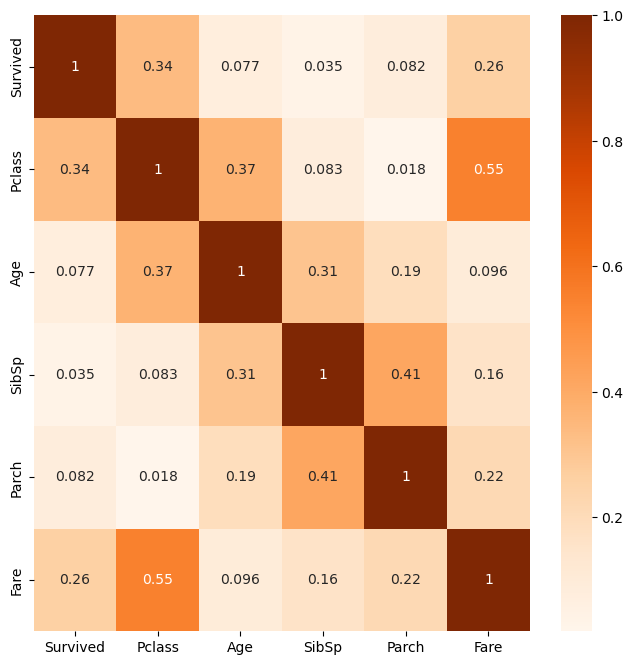

In [16]:
# 히트맵 표현
plt.figure(figsize=(8,8))
sns.heatmap(train.corr(numeric_only = True).abs(), annot = True, cmap = 'Oranges')

In [17]:
# train Pclass 컬럼
train['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [18]:
# 객실 등급을 기준으로 그룹화 groupby() 요금 컬럼 집계함수 중앙값 medean()

train[['Pclass', 'Fare']].groupby('Pclass').median()

,Fare
Pclass,
1,60.2875
2,14.2500
3,8.0500


In [19]:
# Pclass, Sex을 기준으로 그룹핑하여 Fare의 중앙값을 확인
train[['Pclass', 'Sex','Fare']].groupby(['Pclass', 'Sex']).median()

Fare
Pclass Sex             
1      female  82.66455
       male    41.26250
2      female  22.00000
       male    13.00000
3      female  12.47500
       male     7.92500

In [20]:
# 결측치가 있는 행 확인
test[test['Fare'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [21]:
# fillna를 사용해 결측치 채우기
test['Fare'] = test['Fare'].fillna(7.925)

- train, test Age 채우기
    - 위에서 사용했던 Pclass, Sex 컬럼을 그룹핑해서 Age의 집계를학인하고 채워보자

In [22]:
# 평균값을 쓸지 중앙값을 쓸지 판단을 위해 Age 컬럼의 기술통계랑을 확인
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [23]:
# Age 는 Pclass와 상관관계가 높았음
# Pclass, Sex을 그룹핑 하여 Age의 평균 출력
gb1 = train[['Pclass','Sex','Age']].groupby(['Pclass','Sex']).median()

In [24]:
# gb1 - index 2개 - Pclass, Sex
# 멀티 인덱스
# 2등석, 남성 : 평균나이
gb1.loc[ (2,'male') ]

Age    30.0
Name: (2, male), dtype: float64

In [25]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [26]:
# 규칙에 맞게 Pclass와 Sex에 따른 Age 값 반환 하는 함수 함수 만들기
def fill_age(row):
    # row : 받아오는 행의 데이터 (매개변수)

    # 만약 Age 컬럼이 결측치 라면 gb1 테이블의 값을 인덱싱
    if np.isnan(row['Age']):
        return gb1.loc[(row['Pclass'], row['Sex'])]  #.iloc[0] >>> 오류 해결
    # 결측치가 아니라면~ 원래 나이 값을 사용
    else:
     return row['Age']

In [27]:
# 열방향! >> 정수형으로 변경
# #  return gb1.loc[(row['Pclass'], row['Sex'])]  
# 시리즈 단위에서 int 형으로 바꾸주는데 나중에는 변환이 불가 하다는 에러 가 나온다
train['Age'] = train.apply(fill_age, axis = 1).astype(np.int64)

train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_13752\3938661752.py:4: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  train['Age'] = train.apply(fill_age, axis = 1).astype(np.int64)


In [28]:
test['Age'] = test.apply(fill_age, axis = 1).astype(np.int64)

test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 35.9+ KB


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_13752\2238907546.py:1: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  test['Age'] = test.apply(fill_age, axis = 1).astype(np.int64)


#### 정리
- apply, fill_age
- 테스트 데이터를 행단위로 쪼갠거를 매개변수로 내줘서 안쪽 로직이 동작
- 결과값으로 Age를 채울 수 있는 대표값 반환
- 정수형으로 변환 해서 데이터의 'Age' 컬럼에 넣어주는 작업

- train, test Cabin 채우기
    - Cabin 컬럼 데이터 확인
    - 임의의 값으로 결측치를 채울 예정

In [29]:
# train 기준으로 데이터 확인
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [30]:
train['Cabin'].info()

# 타이나닉 호는 A B C... 층으로 표기를 한다 , 알파벳만 뽑아서 사용

<class 'pandas.core.series.Series'>
Index: 891 entries, 1 to 891
Series name: Cabin
Non-Null Count  Dtype 
--------------  ----- 
204 non-null    object
dtypes: object(1)
memory usage: 13.9+ KB


In [31]:
# 우선 임의 값으로 train, test의 Cavin 결측치를 채워보자
# 'M'

train['Cabin'] = train['Cabin'].fillna('M')
test['Cabin'] = test['Cabin'].fillna('M')

In [32]:
train['Cabin'].info()

<class 'pandas.core.series.Series'>
Index: 891 entries, 1 to 891
Series name: Cabin
Non-Null Count  Dtype 
--------------  ----- 
891 non-null    object
dtypes: object(1)
memory usage: 13.9+ KB


In [33]:
# 첫글자 알파벳 1개만 추철하기
# 맨 앞글자 추출 하기
train['Deck'] = train['Cabin'].str[0]
test['Deck'] = test['Cabin'].str[0]

In [34]:
train.columns, test.columns

(Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
        'Fare', 'Cabin', 'Embarked', 'Deck'],
       dtype='object'),
 Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
        'Cabin', 'Embarked', 'Deck'],
       dtype='object'))

In [35]:
# Cabin 컬럼 삭제
# .drop([컬럼명1, 컬럼명2],  axis = , inplace = )
# axis = 0 행 삭제
# axis = 1 열 삭제
train.drop('Cabin', axis = 1, inplace = True)
test.drop('Cabin', axis = 1, inplace = True)

In [36]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
 10  Deck      891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    i

- Deck 시각화

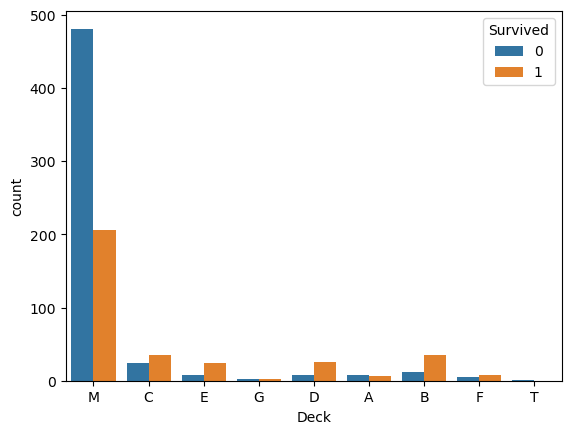

In [37]:
# sns 시각화 도구를 사용해서 범주형 데이터 Deck을 시각화

# countplot  은 개수를 시각화 
# x : x 축
# hue : 분할 기준나타내고자 하는것
sns.countplot(data = train, x = 'Deck', hue = 'Survived')

plt.show()

In [38]:
# M (결측치 데이터 > 임의로 넣은 데이터) 층에서는 상대적으로 사망율이 높다
# 다른 컬럼을 참고 해보자

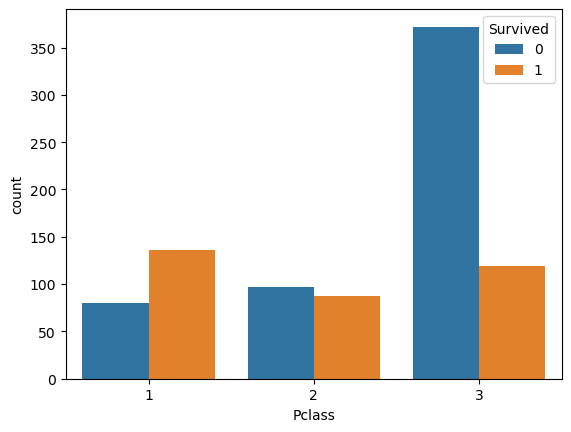

In [39]:
# Pclass가 사망에 얼마나 영향을 미쳤는지 시각화
sns.countplot(data = train, x = 'Pclass', hue = 'Survived')
plt.show()

- Deck과 Pclass 시각화
- x 축 : Deck, hue : Pclass

<function matplotlib.pyplot.show(close=None, block=None)>

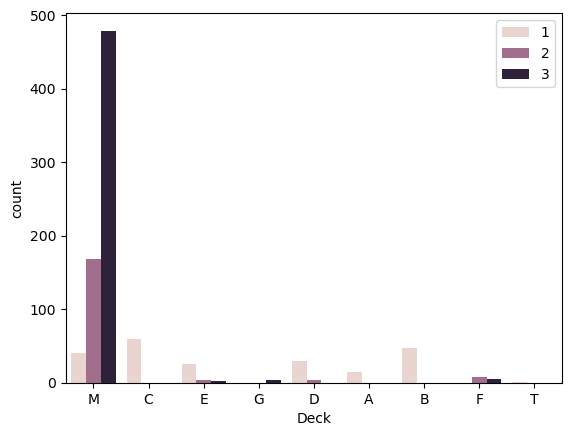

In [40]:
sns.countplot(data = train, x = 'Deck', hue = 'Pclass')
plt.legend()
plt.show

In [41]:
# M 층은 Pclass (객실 등급) 3등석인 경우 대부분임
# 그래서 상대적으로 사망률이 높았다
# M 층인 경우 Pclass 가 3이다
# M 이라는 데이터는 더이상 신경 쓰지 않음 3등석이기 때문에 사망률이 높았음

- 성별에 따른 생존 / 사망 시각화

<function matplotlib.pyplot.show(close=None, block=None)>

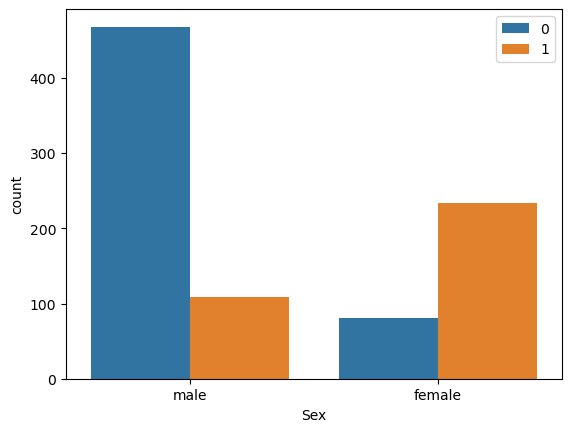

In [42]:
sns.countplot(data = train, x = 'Sex', hue = 'Survived')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

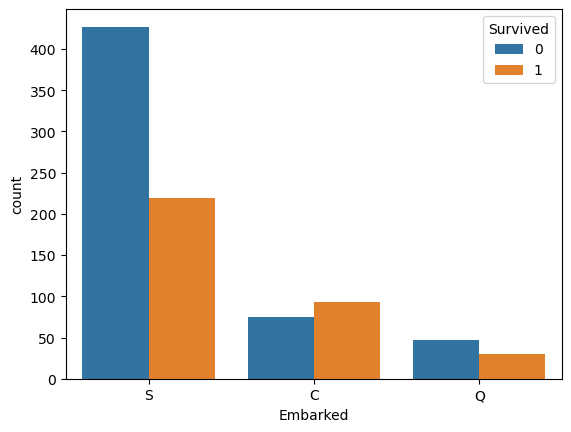

In [43]:
# 승선항
sns.countplot(data = train, x = 'Embarked', hue = 'Survived')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

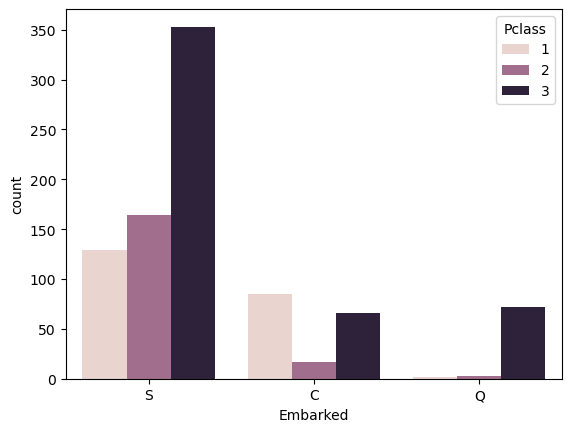

In [44]:
# S승선항에서 Pclass 가 3인 많이 탄건 아닐까...?
sns.countplot(data = train, x = 'Embarked', hue = 'Pclass')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

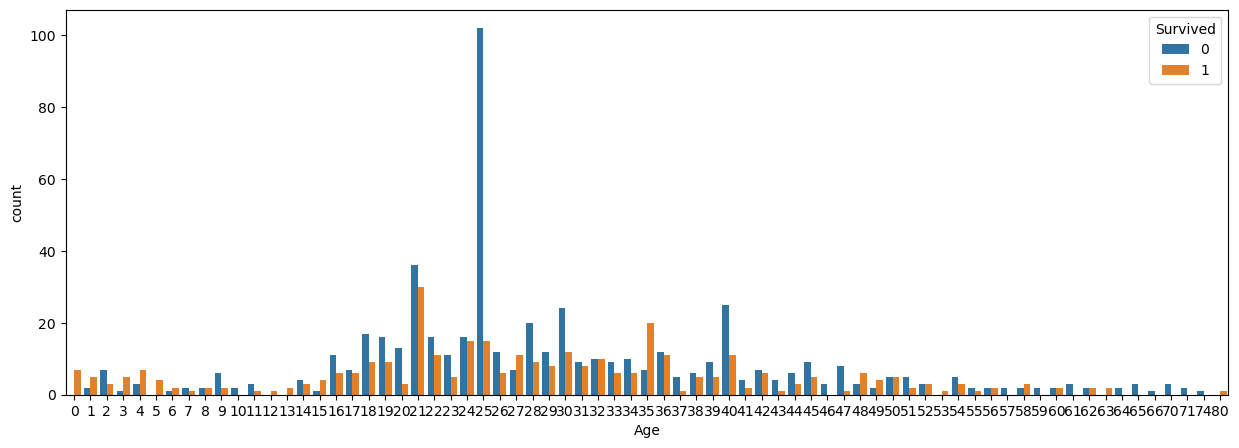

In [45]:
# 나이별
plt.figure(figsize = (15,5))
sns.countplot(data = train, x = 'Age', hue = 'Survived')
plt.show

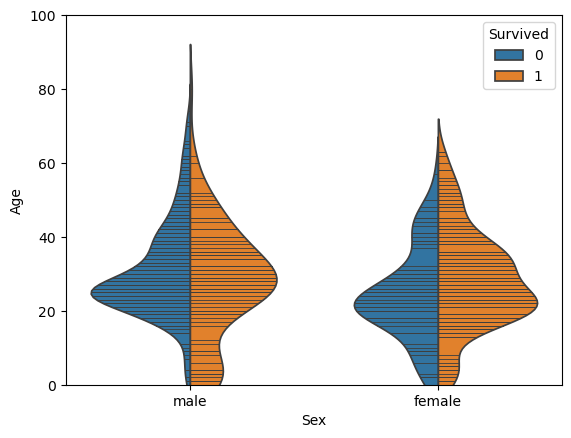

In [46]:
# 나이 데이터 시각화 했더니 해석하기 어려움
# violinplot 을 활용: 수치형 데이터의 분표를 확인 할때 사용하는 그래프
# 바이올린 형태로 데이터의 분포와 밀도를 곡선으로 표현한 그래프
# 데이터가 많이 존재하는 부분은 두껍게
# 데이터가 적게 존재하는 부분은 얇게

# 성별과 나이에 따른 생존 . 사망자 수
sns.violinplot(
    data = train,
    x = 'Sex',
    y = 'Age',
    hue = 'Survived',
    split = True, # 데이터를 양쪽에 나눠서 표현
    inner = 'stick' # 바이올린 내부에 개별 데이터선 유무
)
plt.ylim(0,100)
plt.show()

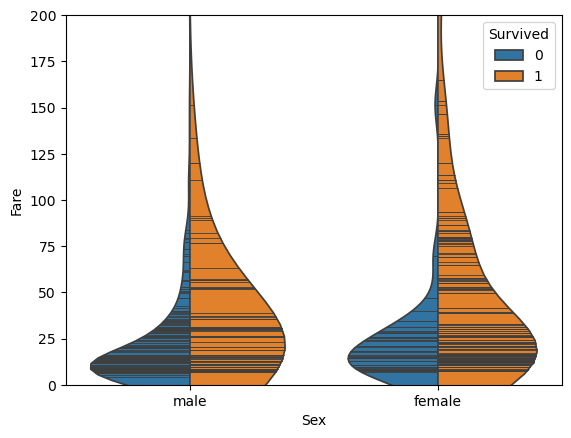

In [47]:
# 성별(Sex)와 요금(Fare)에 따른 생존자(Survived) 시각화

sns.violinplot(
    data = train,
    x = 'Sex',
    y = 'Fare',
    hue = 'Survived',
    split = True,
    inner = 'stick' 
)
plt.ylim(0,200)
plt.show()

In [48]:
# 성별 불문, 요금이 저렴한 사람들의 사망률이 높았다

- 특성 공학 : 새로운 컬럼 생성 (transform)
    - Parch, SibSp를 더해서 가족의 숫자라는 새로운 컬럼 생성
    - train, test 동일하게 적용

In [49]:
# train
train['Family_Size'] = train['Parch'] + train['SibSp'] + 1

In [50]:
# test
test['Family_Size'] = test['Parch'] + test['SibSp'] + 1

<function matplotlib.pyplot.show(close=None, block=None)>

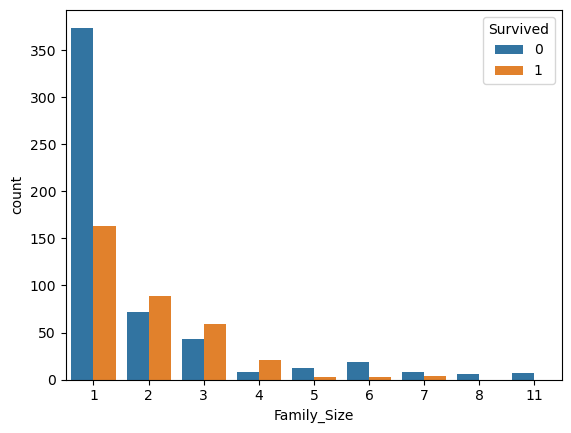

In [51]:
# 시각화 
sns.countplot(data = train, x = 'Family_Size', hue = 'Survived')
plt.show

In [52]:
# 1명일 경우, 사망률이 높다 - alone
# 2명 ~ 4명일 경우 생존율이 높음 - small
# 5명 이상 일 경우, 사망율이 높음 - large
# 인코딩의 반대작업 binng

- 가족의 사이즈가 1 이면 Alone, 2~4명이면 Small, 5명 이상이면 Large로 바꿔줌
- train test 둘다 변경

In [53]:
bins = [0,1,4,11]
# (0,1] >> 0초과 1이하
labels = ['Alone','Small','Large']
# 연속적인 수치형 데이터를 일정 범위로 나누어줌 > 범주형
train['Family_group'] = pd.cut(train['Family_Size'], bins = [0,1,4,11], labels = labels)

In [54]:
test['Family_group'] = pd.cut(test['Family_Size'], bins = [0,1,4,11], labels = labels)

<function matplotlib.pyplot.show(close=None, block=None)>

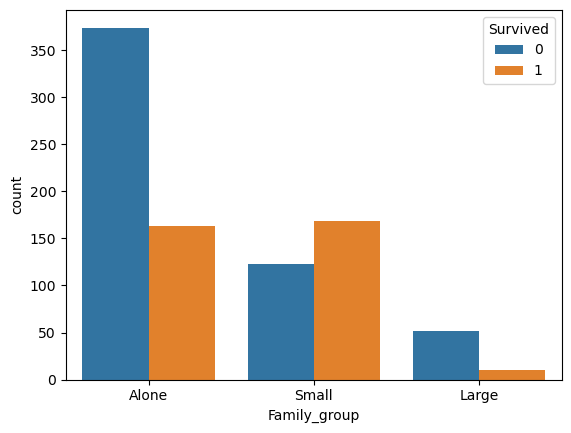

In [55]:
# Family_group 시각화
sns.countplot(data = train, x = 'Family_group', hue = 'Survived')
plt.show

- 불필요한 컬럼 삭제
    - drop
    - 전처리 대상에서 제외된 컬럼과 특성공학 후 불 필요 해진 컬럼

In [56]:
train.info()
# 삭제 대상
# 전처리 후 필요 없어진 컬럼
# 전처리 하지 않은 컬럼중 불필요한 컬럼

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Survived      891 non-null    int64   
 1   Pclass        891 non-null    int64   
 2   Name          891 non-null    object  
 3   Sex           891 non-null    object  
 4   Age           891 non-null    int64   
 5   SibSp         891 non-null    int64   
 6   Parch         891 non-null    int64   
 7   Ticket        891 non-null    object  
 8   Fare          891 non-null    float64 
 9   Embarked      891 non-null    object  
 10  Deck          891 non-null    object  
 11  Family_Size   891 non-null    int64   
 12  Family_group  891 non-null    category
dtypes: category(1), float64(1), int64(6), object(5)
memory usage: 91.5+ KB


In [57]:
# 이름, 티켓 삭제
train.drop(['Name','Ticket', 'SibSp','Parch', 'Family_Size'], axis = 1, inplace = True)
test.drop(['Name','Ticket', 'SibSp','Parch', 'Family_Size'], axis = 1, inplace = True)

In [58]:
train.shape, test.shape

((891, 8), (418, 7))

- train에는 정답 데이터와 문제 데이터가 하나의 프레임으로 들어가 있는 상태 (X_train, y_train)
- test는 정답을 제공하지 않음 (X_test)

In [59]:
X_train = train.drop('Survived', axis = 1)
y_train = train['Survived']

X_test = test

print(X_train.shape, y_train.shape)
print(X_test.shape)

(891, 7) (891,)
(418, 7)


- 범주형 데이터는 학습용으로 사용할 수 없으니, 수치형 변환
- Encoding
- 구분 용도를 위해 one-hot Encoding

In [60]:
X_train_one_hot = pd.get_dummies(X_train)
X_test_one_hot = pd.get_dummies(X_test)

In [61]:
X_train_one_hot

,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_M,Deck_T,Family_group_Alone,Family_group_Small,Family_group_Large
PassengerId,,,,,,,,,,,,,,,,,,,,
1,3,22,7.2500,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False
2,1,38,71.2833,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False
3,3,26,7.9250,True,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False
4,1,35,53.1000,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False
5,3,35,8.0500,False,True,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,2,27,13.0000,False,True,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False
888,1,19,30.0000,True,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False
889,3,21,23.4500,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False


In [62]:
X_train_one_hot.shape

(891, 20)

In [63]:
X_test_one_hot.shape

(418, 19)

In [64]:
X_train_one_hot.columns

Index(['Pclass', 'Age', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D',
       'Deck_E', 'Deck_F', 'Deck_G', 'Deck_M', 'Deck_T', 'Family_group_Alone',
       'Family_group_Small', 'Family_group_Large'],
      dtype='object')

In [65]:
X_test_one_hot.columns

Index(['Pclass', 'Age', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D',
       'Deck_E', 'Deck_F', 'Deck_G', 'Deck_M', 'Family_group_Alone',
       'Family_group_Small', 'Family_group_Large'],
      dtype='object')

- 특성 개수 맞추기
    - 부족한 컬럼 명을 확인
    - set() 집합 자료구조를 활용해서 찾아보자

In [66]:
# set 이라는 데이터 타입 (집합 자료형)
set(X_train_one_hot.columns) - set(X_test_one_hot.columns)

{'Deck_T'}

In [67]:
# X_test에 Deck_T 라는 컬럼을 새롭게 추가
X_test_one_hot['Deck_T'] = 0
X_test_one_hot['Deck_T']

PassengerId
892     0
893     0
894     0
895     0
896     0
       ..
1305    0
1306    0
1307    0
1308    0
1309    0
Name: Deck_T, Length: 418, dtype: int64

In [68]:
X_train_one_hot.info()
X_test_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Pclass              891 non-null    int64  
 1   Age                 891 non-null    int64  
 2   Fare                891 non-null    float64
 3   Sex_female          891 non-null    bool   
 4   Sex_male            891 non-null    bool   
 5   Embarked_C          891 non-null    bool   
 6   Embarked_Q          891 non-null    bool   
 7   Embarked_S          891 non-null    bool   
 8   Deck_A              891 non-null    bool   
 9   Deck_B              891 non-null    bool   
 10  Deck_C              891 non-null    bool   
 11  Deck_D              891 non-null    bool   
 12  Deck_E              891 non-null    bool   
 13  Deck_F              891 non-null    bool   
 14  Deck_G              891 non-null    bool   
 15  Deck_M              891 non-null    bool   
 16  Deck_T       

In [97]:
# X_train, X_test 의 컬럼의 순서가 다르다.
# 순서를 맞춰준다
# X_train_one_hot.columns
X_test_one_hot = X_test_one_hot[X_train_one_hot.columns]

In [70]:
print(X_train_one_hot.shape, y_train.shape)
print(X_test_one_hot.shape)

(891, 20) (891,)
(418, 20)


#### 모델 선택 학습

In [73]:
# 라이브러리 가져오기
from sklearn.tree import DecisionTreeClassifier

# 교차 검증
from sklearn.model_selection import cross_val_score

In [75]:
# 모델 객체 확인 하이퍼 파라미터 조절 NO >> 과대 적합 발생
tree_model = DecisionTreeClassifier()

In [77]:
# 5개로 나누어서 
cv_result = cross_val_score(tree_model, X_train_one_hot, y_train, cv =5)
cv_result

array([0.75418994, 0.7752809 , 0.84831461, 0.76966292, 0.80337079])

In [82]:
cv_result.mean()
# 평균 적으로 78% 성능
# test데이터에서는 조금더 정확도가 떨어 질수있다

0.7901638315234447

- tree model의 하이퍼 파라미터 조정

In [87]:
tree_model = DecisionTreeClassifier(max_depth = 3)
# 교차 검즘
result = cross_val_score(tree_model, X_train_one_hot, y_train, cv =5)
result

array([0.81005587, 0.81460674, 0.80337079, 0.78089888, 0.8258427 ])

In [88]:
result.mean()

0.8069549934090766

In [100]:
# 교차 검증을 하면서 하이퍼 파라미터 조정 확인 1 ~ 9
for md in range(1,10):
    tree_model = DecisionTreeClassifier(max_depth = md)
    result = cross_val_score(tree_model, X_train_one_hot, y_train, cv = 5)
    print(f'depth : {md}', result.mean())

depth : 1 0.7867365513778168
depth : 2 0.773316176009039
depth : 3 0.8069549934090766
depth : 4 0.807005209967987
depth : 5 0.8148201619484026
depth : 6 0.8170736300295023
depth : 7 0.8159437574540205
depth : 8 0.8181783943255289
depth : 9 0.8114619295712762


In [101]:
tree_model2 = DecisionTreeClassifier(max_depth = 6)
# 학습
tree_model2.fit(X_train_one_hot, y_train)

# 예측값
pre2 = tree_model2.predict(X_test_one_hot)

# 모델 답안지 작성  tree_model_(n).csv 파일 만들기!
result2 = pd.read_csv('./data/gender_submission.csv')
result2['Survived'] = pre2
result2.to_csv('data/tree_model_02.csv', index = False)

In [ ]:
# tree_model2가 어떤 특성을 중요하게 생각하는지, 특성 중요도 확인

In [102]:
fi = tree_model2.feature_importances_
fi

array([0.12587444, 0.11648766, 0.08001609, 0.50258411, 0.        ,
       0.00301714, 0.        , 0.0083284 , 0.        , 0.        ,
       0.        , 0.        , 0.01510388, 0.        , 0.        ,
       0.06098512, 0.        , 0.        , 0.02776957, 0.05983358])

In [104]:
fi_s = pd.DataFrame(fi, index = X_train_one_hot.columns, columns = ['imp'])
fi_s

,imp
Pclass,0.125874
Age,0.116488
Fare,0.080016
Sex_female,0.502584
Sex_male,0.000000
Embarked_C,0.003017
Embarked_Q,0.000000
Embarked_S,0.008328
Deck_A,0.000000
Deck_B,0.000000


<Figure size 500x500 with 0 Axes>

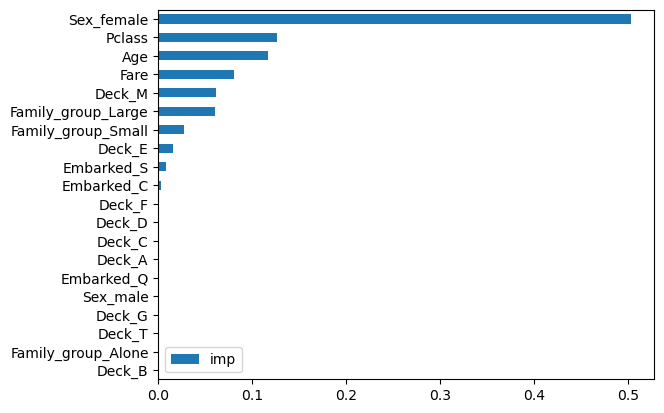

In [106]:
plt.figure(figsize = (5,5))
# 수평 막대 그래프
fi_s.sort_values('imp', ascending = True).plot.barh()
plt.show()

### 앙상블
- 여러 모델을 결합하는 방식으로 성능을 올리는 기법
    1. 보팅(Voting)
       - 여러개의 다른 종류의 모델이 예측한 결과를 투표 혹은 평균을 통해서 최종 결정
         A. 하드보팅 (Hard-Voting) : 투표(다수결)
         B. 소프트 보팅(Soft-Voting) : 확률값을 통한 결정
    2. 배깅(Bagging)
       - 여러개의 같은 종류의 모델이 예측한 결과를 투표 혹은 평균을 통해서 최종 결정
       - 대표 모델 : RandomForest (Decision Tree 를 여러개 사용하는 모델)
    3. 부스팅(Boostring)
       - 여러 모델을 순차적으로 학습 시켜서 이전 모델의 오류를 보정
       - 대표 모델 : AdaBoost, GradientBoost
       - 후속 모델이 이전 모델의 잘못된 예측을 수정하면서 성능이 점점 좋아지는 현상

In [107]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

#### 랜덤 포레스트

In [115]:
# 하이퍼파라미터 설정
forest_model = RandomForestClassifier(n_estimators = 100, # 트리의 개수
                                    max_features = 5, # 최대 특성
                                    max_depth = 4, # 최대 깊이
                                    random_state = 11)
                                      

In [109]:
# 랜덤 포레스트 교차검증
result_RF = cross_val_score(froest_model,
                           X_train_one_hot,
                           y_train,
                           cv = 5)
result_RF

array([0.82122905, 0.82022472, 0.82022472, 0.79775281, 0.82022472])

In [110]:
result_RF.mean()

0.8159312033142928

#### 에이다 부스팅

In [111]:
ada_model = AdaBoostClassifier(n_estimators=100, random_state=14)

In [112]:
result_ada = cross_val_score(ada_model,
                           X_train_one_hot,
                           y_train,
                           cv = 5)
result_ada

C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\smh

array([0.77653631, 0.81460674, 0.80898876, 0.8258427 , 0.83707865])

In [113]:
result_ada.mean()

0.8126106333563493

#### 보팅

In [117]:
# 모델여러개
voting_model = VotingClassifier(estimators=[('tree', tree_model2),
                                           ('forest',forest_model),
                                           ('ada',ada_model)],voting = 'soft')
voting_model

VotingClassifier(estimators=[('tree', DecisionTreeClassifier(max_depth=6)),
                             ('forest',
                              RandomForestClassifier(max_depth=4,
                                                     max_features=5,
                                                     random_state=11)),
                             ('ada',
                              AdaBoostClassifier(n_estimators=100,
                                                 random_state=14))],
                 voting='soft')

In [119]:
# 교차검증
result_voting = cross_val_score(voting_model, X_train_one_hot, y_train, cv = 5)
result_voting

C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\smh

array([0.81564246, 0.80898876, 0.83146067, 0.79775281, 0.84269663])

In [120]:
result_voting.mean()

0.8193082669010107

### xgboost, lightgbm

In [121]:
# xgboost 설치
!pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
    --------------------------------------- 3.4/150.0 MB 18.3 MB/s eta 0:00:09
   --- ------------------------------------ 13.6/150.0 MB 35.7 MB/s eta 0:00:04
   ------ --------------------------------- 22.8/150.0 MB 38.9 MB/s eta 0:00:04
   -------- ------------------------------- 32.2/150.0 MB 40.1 MB/s eta 0:00:03
   ------------ --------------------------- 45.4/150.0 MB 45.1 MB/s eta 0:00:03
   --------------- ------------------------ 59.5/150.0 MB 48.6 MB/s eta 0:00:02
   ------------------- -------------------- 73.7/150.0 MB 51.0 MB/s eta 0:00:02
   ----------------------- ---------------- 86.8/150.0 MB 52.7 MB/s eta 0:00:02
   -------------------------- ------------ 100.7/150.0 MB 54.4 MB/s eta 0:00:01
   ----------------------------- --------- 115.1/150.0 MB 55.7 MB/s eta 0:00:01
   -------------------------------- ------ 123.7/150.0 MB 56.0 MB/s eta 0:00:01
   ----------------------------------- --- 135.8/1

In [122]:
# light gbm 설치
!pip install lightgbm

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 38.4 MB/s eta 0:00:00


In [123]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [124]:
# 숫자형 데이터 인지 확인 필수
xg_model = XGBClassifier(n_estimators = 100, random_state = 13)

In [129]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 891 entries, 1 to 891
Series name: Survived
Non-Null Count  Dtype 
--------------  ----- 
891 non-null    object
dtypes: object(1)
memory usage: 13.9+ KB


In [132]:
y_train = y_train.astype('int64')

In [133]:
result_xg = cross_val_score(xg_model,
                           X_train_one_hot,
                           y_train,
                           cv = 5)
result_xg

array([0.79329609, 0.80898876, 0.84831461, 0.79775281, 0.85393258])

In [187]:
result_xg.mean()

0.8204569706860838

#### LightBGM

In [188]:
lgb_model = LGBMClassifier(n_estimators = 100, random_state = 55)

In [192]:
result_lgb = cross_val_score(lgb_model,
                           X_train_one_hot,
                           y_train,
                           cv = 5)
result_lgb

[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000645 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 207
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

array([0.79888268, 0.81460674, 0.86516854, 0.80337079, 0.87078652])

In [193]:
result_lgb.mean()

0.8305630531667818

In [ ]:
result_lgb = cross_val_score(lgb_model,
                           X_train_one_hot,
                           y_train,
                           cv = 5)
result_lgb

In [205]:
# 모델 학습
xg_model = XGBClassifier(n_estimators = 100, random_state = 13)
xg_model.fit(X_train_one_hot1, y_train)

# 예측값
pre_xgb= lgb_model.predict(X_test_one_hot)

# 모델 답안지 작성
result_lgb = pd.read_csv('./data/gender_submission.csv')
result_lgb['Survived'] = pre_xgb
result_lgb.to_csv('data/model_05.csv', index=False)

In [201]:
X_train_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Pclass              891 non-null    int64  
 1   Age                 891 non-null    int64  
 2   Fare                891 non-null    float64
 3   Sex_female          891 non-null    bool   
 4   Sex_male            891 non-null    bool   
 5   Embarked_C          891 non-null    bool   
 6   Embarked_Q          891 non-null    bool   
 7   Embarked_S          891 non-null    bool   
 8   Deck_A              891 non-null    bool   
 9   Deck_B              891 non-null    bool   
 10  Deck_C              891 non-null    bool   
 11  Deck_D              891 non-null    bool   
 12  Deck_E              891 non-null    bool   
 13  Deck_F              891 non-null    bool   
 14  Deck_G              891 non-null    bool   
 15  Deck_M              891 non-null    bool   
 16  Deck_T       

In [204]:
group_surv = train.groupby(['Embarked','Pclass'])['Survived'].mean()
X_train_one_hot1 = X_train_one_hot.assign(
    Emb_Pclass_SurvRate = train.apply(lambda r: group_surv.loc[(r['Embarked'], r['Pclass'])], axis=1),
    Age_Fare            = lambda df: df['Age'] * df['Fare']
)

In [206]:
# 1) 그룹별 생존율 매핑 + Age×Fare 추가
group_surv = train.groupby(['Embarked','Pclass'])['Survived'].mean()
X_train_one_hot1 = X_train_one_hot.assign(
    Emb_Pclass_SurvRate = train.apply(lambda r: group_surv.loc[(r['Embarked'], r['Pclass'])], axis=1),
    Age_Fare            = lambda df: df['Age'] * df['Fare']
)

# 2) 랜덤 서치로 XGB 하이퍼파라미터 최적화
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

param_dist = {
    'n_estimators':     [50,100,200,300],
    'max_depth':        [3,4,5,6,8],
    'learning_rate':    [0.01,0.05,0.1,0.2],
    'subsample':        [0.6,0.8,1.0],
    'colsample_bytree': [0.6,0.8,1.0]
}

rs = RandomizedSearchCV(
    XGBClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=50, cv=5, scoring='accuracy', n_jobs=-1, random_state=42
)

# **여기서** X_train_one_hot1 을 넣습니다
rs.fit(X_train_one_hot1, y_train)

print("Best params:", rs.best_params_)
print("Best CV accuracy:", rs.best_score_)


Best params: {'subsample': 0.6, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
Best CV accuracy: 0.8440085368150146


In [211]:
# 1) train에서 만든 group_surv 같은 코드 블록이 필요합니다.
group_surv = train.groupby(['Embarked','Pclass'])['Survived'].mean()

# 2) 테스트 데이터에도 동일 피처 추가
X_test_one_hot1 = X_test_one_hot.assign(
    Emb_Pclass_SurvRate = test.apply(lambda r: group_surv.loc[(r['Embarked'], r['Pclass'])], axis=1),
    Age_Fare            = lambda df: df['Age'] * df['Fare']
)

best_xgb.fit(X_train_one_hot1, y_train)
pre_xgb = best_xgb.predict(X_test_one_hot1)


# 4) 결과 파일 저장
submission = pd.read_csv('./data/gender_submission.csv')
submission['Survived'] = pre_xgb
submission.to_csv('data/model_06.csv', index=False)


In [240]:
import numpy as np
import pandas as pd

# 데이터 로드
train = pd.read_csv('./data/train.csv', index_col='PassengerId')
test = pd.read_csv('./data/test.csv', index_col='PassengerId')

# 이미 Name, Ticket, SibSp, Parch 삭제되었다고 가정!
# 그렇지 않다면 다음 한 줄을 먼저 실행
# for df in [train, test]: df.drop(['Name','Ticket','SibSp','Parch'], axis=1, inplace=True, errors='ignore')

# 데이터 합치기
all_data = pd.concat([train, test], sort=False)

# (1) Family_Size, FamilyGroup
if 'Family_Size' not in all_data.columns:
    all_data['Family_Size'] = 1  # 이미 삭제된 경우 기본값 1
all_data['FamilyGroup'] = pd.cut(all_data['Family_Size'], bins=[0,1,4,20], labels=['Alone','Small','Large'])

# (2) Age, Fare 결측치 Pclass+Sex별 중앙값으로 보완
for col in ['Age', 'Fare']:
    all_data[col] = all_data.groupby(['Pclass', 'Sex'])[col].transform(
        lambda x: x.fillna(x.median())
    )

# (3) AgeGroup, FareGroup
all_data['AgeGroup'] = pd.cut(all_data['Age'], [0, 10, 18, 25, 35, 60, 100],
                             labels=['Child','Teen','Youth','YoungAdult','Adult','Senior'])
all_data['FareGroup'] = pd.qcut(all_data['Fare'], 4, labels=['Low','MidLow','MidHigh','High'])

# (4) Deck(=Cabin 첫글자), 결측치 대체
if 'Cabin' in all_data.columns:
    all_data['Cabin'] = all_data['Cabin'].fillna('M')
    all_data['Deck'] = all_data['Cabin'].str[0]
    drop_deck_col = ['Cabin']
else:
    all_data['Deck'] = 'M'
    drop_deck_col = []

# (5) 교호작용 특성 (Sex_Pclass, Embarked_Sex)
all_data['Sex_Pclass'] = all_data['Sex'] + '_' + all_data['Pclass'].astype(str)
all_data['Embarked_Sex'] = all_data['Embarked'].astype(str) + '_' + all_data['Sex']

# (6) 불필요 컬럼 삭제
drop_cols = ['Family_Size'] + drop_deck_col
if 'Survived' in all_data.columns:
    features = [c for c in all_data.columns if c not in drop_cols + ['Survived']]
else:
    features = [c for c in all_data.columns if c not in drop_cols]

all_data = pd.get_dummies(all_data[features], drop_first=True)

# train/test 다시 분할
train_X = all_data.iloc[:len(train), :]
train_y = train['Survived']
test_X  = all_data.iloc[len(train):, :]

# XGBoost 모델 학습 및 예측
from xgboost import XGBClassifier
model = XGBClassifier(
    n_estimators=500, max_depth=4,
    learning_rate=0.02, subsample=0.9, colsample_bytree=0.7, random_state=42
)
model.fit(train_X, train_y)
pred = model.predict(test_X)

# 제출
submission = pd.read_csv('./data/gender_submission.csv', index_col='PassengerId')
submission['Survived'] = pred
submission.to_csv('data/titanic_final.csv')


In [239]:
# 타이타닉 랜덤 포레스트 모델


# 필요한 라이브러리 임포트
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# 데이터 로드
train_data = pd.read_csv("./data/train.csv")
test_data = pd.read_csv("./data/test.csv")

# 특성 선택
features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

# 타겟 변수
y = train_data["Survived"]

# 랜덤 포레스트 모델 생성 및 학습
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
rf_model.fit(X, y)

# 예측
predictions = rf_model.predict(X_test)

# 제출 파일 생성
result_rf = pd.read_csv('./data/gender_submission.csv')
result_rf['Survived'] = predictions
result_rf.to_csv('data/random_forest_submission.csv', index=False)

print("랜덤 포레스트 모델의 예측이 완료되었습니다.")


랜덤 포레스트 모델의 예측이 완료되었습니다.


In [243]:
# 파생변수/조합을 최대한 늘려서 get_dummies 후 스태킹 앙상블
# 위의 예시 피처 다 만든 후...

from sklearn.ensemble import StackingClassifier, RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

all_X = pd.concat([train_X, test_X])
all_X = pd.get_dummies(all_X, drop_first=True)
train_X = all_X.iloc[:len(train), :]
test_X = all_X.iloc[len(train):, :]

stack = StackingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(n_estimators=400, max_depth=7, random_state=42)),
        ('gb', GradientBoostingClassifier(n_estimators=200, learning_rate=0.05, random_state=42)),
        ('xgb', XGBClassifier(n_estimators=400, learning_rate=0.02, max_depth=5, random_state=42)),
        ('lgb', LGBMClassifier(n_estimators=300, learning_rate=0.03, num_leaves=15, random_state=42))
    ],
    final_estimator=RandomForestClassifier(n_estimators=100, random_state=42),
    n_jobs=-1
)
stack.fit(train_X, train['Survived'])
pred = stack.predict(test_X)

# 제출
submission = pd.read_csv('./data/gender_submission.csv')
submission['Survived'] = pred
submission.to_csv('data/titanic_stack_final.csv', index=False)


In [253]:
# 타이타닉 예측 모델 - 고급 기법


# 필요한 라이브러리 임포트

from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_selection import SelectKBest, SelectFromModel
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier

# 교차 검증 점수 계산 함수
def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv=5, scoring=scoring)
    return np.mean(xval)


# 데이터 준비
train_data = pd.read_csv('./data/train.csv')
test_data = pd.read_csv('./data/test.csv')

# 타겟 변수 정의
targets = train_data['Survived']

# 특성 선택
features = ["Pclass", "Sex", "SibSp", "Parch"]
train = pd.get_dummies(train_data[features])
test = pd.get_dummies(test_data[features])

# 특성 선택을 위한 랜덤 포레스트
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf.fit(train, targets)

# 데이터 준비
train_data = pd.read_csv('./data/train.csv')
test_data = pd.read_csv('./data/test.csv')

# 특성 선택을 위한 랜덤 포레스트
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf.fit(train, targets)

# 특성 중요도 기반 특성 선택
model = SelectFromModel(clf, prefit=True)
train_reduced = model.transform(train)
test_reduced = model.transform(test)

# 그리드서치를 통한 하이퍼파라미터 최적화
parameter_grid = {
    'max_depth': [4, 6, 8],
    'n_estimators': [50, 10],
    'max_features': ['sqrt', 'auto', 'log2'],
    'min_samples_split': [2, 3, 10],
    'min_samples_leaf': [1, 3, 10],
    'bootstrap': [True, False]
}

forest = RandomForestClassifier()
cross_validation = StratifiedKFold(n_splits=5)

grid_search = GridSearchCV(
    forest,
    scoring='accuracy',
    param_grid=parameter_grid,
    cv=cross_validation,
    verbose=1
)

grid_search.fit(train, targets)
model = grid_search

# 최종 예측 및 결과 저장
output = model.predict(test).astype(int)
df_output = pd.DataFrame()
df_output['PassengerId'] = test_data['PassengerId']
df_output['Survived'] = output
df_output.to_csv('./data/blended_models.csv', index=False)

# 모델 블렌딩
models = [
    LogisticRegression(),
    LogisticRegressionCV(),
    RandomForestClassifier(),
    GradientBoostingClassifier()
]

trained_models = []
for model in models:
    model.fit(train, targets)
    trained_models.append(model)

predictions = []
for model in trained_models:
    predictions.append(model.predict_proba(test)[:, 1])

predictions_df = pd.DataFrame(predictions).T
predictions_df['out'] = predictions_df.mean(axis=1)
predictions_df['PassengerId'] = test_data['PassengerId']
predictions_df['out'] = predictions_df['out'].map(lambda s: 1 if s >= 0.5 else 0)

predictions_df = predictions_df[['PassengerId', 'out']]
predictions_df.columns = ['PassengerId', 'Survived']
predictions_df.to_csv('./data/blended_models.csv', index=False)


C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\smhrd\anaconda3\Lib\site-packa